# Multiple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Data Preprocessing 

In [3]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

<Axes: >

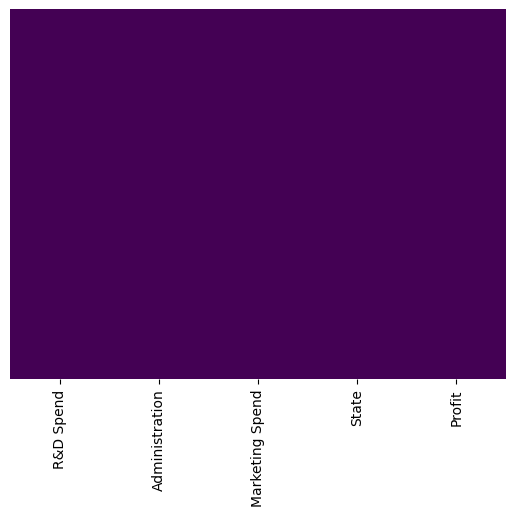

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Encoding State column

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

### Train Test and Split data

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Train and Test Model 

In [7]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred=regressor.predict(X_test)

In [9]:
np.set_printoptions(precision=2)
print(np.concatenate(( y_pred.reshape(len(y_pred),1) , y_test.reshape(len(y_test),1) ),1))

[[ 69634.41  71498.49]
 [105119.11 103282.38]
 [162446.24 155752.6 ]
 [120332.16 111313.02]
 [ 59639.94  49490.75]
 [127514.6  134307.35]
 [113149.32 108552.04]
 [130989.42 141585.52]
 [132449.27 125370.37]
 [152073.01 132602.65]]


In [10]:
regressor.coef_

array([-1.29e+03,  8.95e+02,  3.99e+02,  7.87e-01,  1.09e-02,  3.47e-02])

In [11]:
regressor.intercept_

46124.96806954102